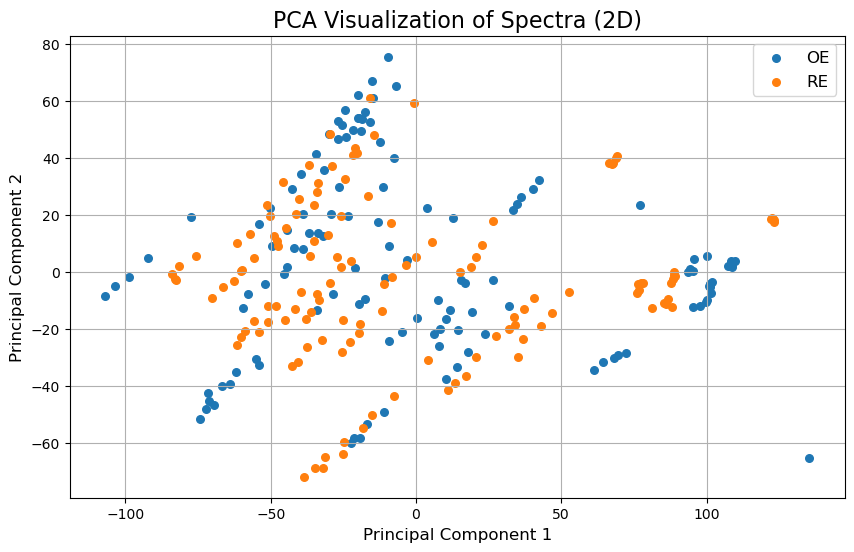

In [2]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Beispiel: Pfad zum Ordner mit den normalisierten Spektren
folder_path = "/Users/leokavallaris/FTIR ATR/Spectra OE RE/101"

# Ziel-Länge der Spektren
target_length = 4600

# Sammle die normalisierten Spektren und ihre Klassen (RE oder OE) in separaten Listen
spectra = []
labels = []  # RE oder OE
for file_name in os.listdir(folder_path):
    if file_name.endswith("_cut.csv"):
        # Lese die normalisierten Spektraldaten ein
        file_path = os.path.join(folder_path, file_name)
        normalized_absorbance = np.loadtxt(file_path, delimiter=',')
        # Zuschnitt auf die Ziel-Länge
        if len(normalized_absorbance) > target_length:
            normalized_absorbance = normalized_absorbance[:target_length]
        elif len(normalized_absorbance) < target_length:
            # Padding mit Nullen, falls erforderlich
            normalized_absorbance = np.pad(normalized_absorbance, (0, target_length - len(normalized_absorbance)), mode='constant')
        spectra.append(normalized_absorbance)
        # Bestimme die Klasse (RE oder OE) anhand des Dateinamens
        if "RE" in file_name:
            labels.append("RE")
        elif "OE" in file_name:
            labels.append("OE")

# Konvertiere die Listen von Spektren und Labels in numpy-Arrays
spectra = np.array(spectra)
labels = np.array(labels)

# Skalieren der Daten
scaler = StandardScaler()
scaled_spectra = scaler.fit_transform(spectra)

# Anwenden von PCA mit zwei Hauptkomponenten
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(scaled_spectra)

# Plot der PCA-Einbettung
plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    indices = np.where(labels == label)
    plt.scatter(pca_embeddings[indices, 0], pca_embeddings[indices, 1], label=label, s=30)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA Visualization of Spectra (2D)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

